<a href="https://colab.research.google.com/github/roy-sub/Machine-Learning-Bootcamp/blob/main/Real_world_data_science_tasks_using_pandas_and_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Loading data into Pandas**

###**[Dataset](https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Output)**

In [25]:
import pandas as pd
df = pd.read_csv("/content/all_data.csv")
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


###**Clean up the data!**
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data.

###**Drop rows of NAN**

In [27]:
df[df.isna().any(axis=1)].head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.dropna(how='all', inplace=True)
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


###**Get rid of text in order date column**

In [37]:
df = df[df['Order Date'].str[0:2]!='Or']

###**Make columns correct type**

In [38]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

###**Augment data with additional columns**

###**Add month column**

In [41]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [45]:
df["Month I"] = df["Order Date"].str[0:2]
df["Month I"] = pd.to_numeric(df["Month I"])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


###**Add month column (alternative method)**

In [46]:
df["Month II"] = pd.to_datetime(df["Order Date"]).dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,4


###**Add city column**

In [48]:
def getCity(address):
  return address.split(',')[1].strip(" ")

def getState(address):
  return address.split(',')[2].split(" ")[1]

df["City Address"] = df["Purchase Address"].apply(lambda x : f"{getCity(x)} {getState(x)}")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA


###**Data Exploration !**

###**Question 1: What was the best month for sales? How much was earned that month?**

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [49]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA


In [53]:
df.groupby(['Month I']).sum()

,Quantity Ordered,Price Each,Sales,Month II
Month I,,,,
1,10903,1811768.38,1822256.73,9709
2,13449,2188884.72,2202022.42,23950
3,17005,2791207.83,2807100.38,45459
4,20558,3367671.02,3390670.24,73116
5,18667,3135125.13,3152606.75,82830
6,15253,2562025.61,2577802.26,81324
7,16072,2632539.56,2647775.76,100051
8,13448,2230345.42,2244467.88,95688
9,13109,2084992.09,2097560.13,104589


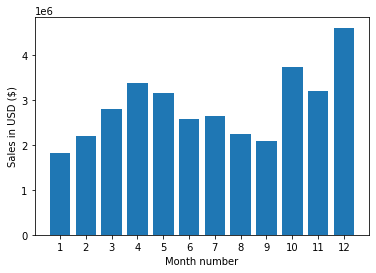

In [58]:
import matplotlib.pyplot as plt
months = range(1, 13)

plt.bar(months, df.groupby(['Month I']).sum()['Sales'] )
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

plt.show()

###**Question 2: What city sold the most product?**

In [59]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA


In [60]:
df.groupby(["City Address"]).sum()

,Quantity Ordered,Price Each,Sales,Month I,Month II
City Address,,,,,
Atlanta GA,16602,2779908.20,2795498.58,104794,104794
Austin TX,11153,1809873.61,1819581.75,69829,69829
Boston MA,22528,3637409.77,3661642.01,141112,141112
Dallas TX,16730,2752627.82,2767975.40,104620,104620
Los Angeles CA,33289,5421435.23,5452570.80,208325,208325
New York City NY,27932,4635370.83,4664317.43,175741,175741
Portland ME,2750,447189.25,449758.27,17144,17144
Portland OR,11303,1860558.22,1870732.34,70621,70621
San Francisco CA,50239,8211461.74,8262203.91,315520,315520


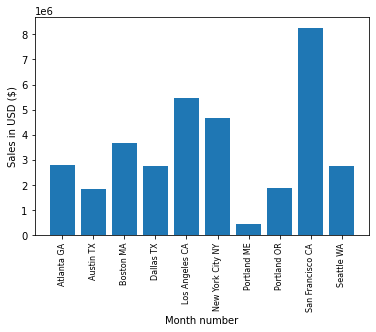

In [62]:
keys = [city for city, df in df.groupby(["City Address"])]
plt.bar(keys, df.groupby(["City Address"]).sum()["Sales"])
plt.xticks(keys, rotation ="vertical", size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

plt.show()

###**Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?**

In [63]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA


In [64]:
df["Hour"] = pd.to_datetime(df["Order Date"]).dt.hour
df["minute"] = pd.to_datetime(df["Order Date"]).dt.minute

In [65]:
df["Count"] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address,Hour,minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,4,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,4,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA,9,27,1


In [67]:
df.groupby(["Hour"]).count().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address,minute,Count
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854


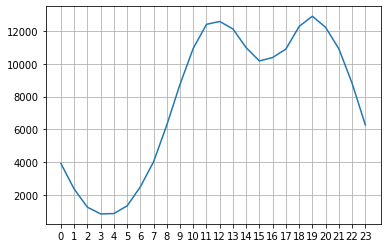

In [69]:
keys = [hour for hour, df in df.groupby(["Hour"])]
plt.plot(keys, df.groupby(["Hour"]).count()["Count"])
plt.xticks(keys)
plt.grid()
plt.show()

plt.show()

###**Question 4: What products are most often sold together?**

###**[Referenced I](https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time) [Referenced II](https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby) [Referenced III](https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary) [Referenced IV](https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib)**


In [71]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address,Hour,minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,4,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,4,Boston MA,22,30,1


In [73]:
dfI = df[df["Order ID"].duplicated (keep = False)]
dfI.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address,Hour,minute,Count
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA,14,38,1
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,4,4,Los Angeles CA,19,42,1
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,4,4,Los Angeles CA,19,42,1


In [76]:
dfI["Grouped"] = dfI.groupby(["Order ID"])["Product"].transform(lambda x: ','.join(x))
dfI.head(4)

<ipython-input-76-821b4bda955f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfI["Grouped"] = dfI.groupby(["Order ID"])["Product"].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address,Hour,minute,Count,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,4,4,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,4,4,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"


In [77]:
dfII = dfI[["Order ID", "Grouped"]].drop_duplicates()
dfII.head(4)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"


In [78]:
dfII.reset_index(drop=True, inplace=True)
dfII.head(4)

,Order ID,Grouped
0,176560,"Google Phone,Wired Headphones"
1,176574,"Google Phone,USB-C Charging Cable"
2,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176586,"AAA Batteries (4-pack),Google Phone"


In [79]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dfII['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


###**Question 5: What product sold the most? Why do you think it sold the most?**

###**[Referenced](https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib)**

In [81]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month I,Month II,City Address,Hour,minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,4,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,4,Boston MA,22,30,1


In [84]:
df.groupby("Product").sum().head(5)

,Quantity Ordered,Price Each,Sales,Month I,Month II,Hour,minute,Count
Product,,,,,,,,
20in Monitor,4129,451068.99,454148.71,29336,29336,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,44440,90916,184331,6230
27in FHD Monitor,7550,1125974.93,1132424.50,52558,52558,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,43304,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,106118.40,145558,145558,298342,609039,20577


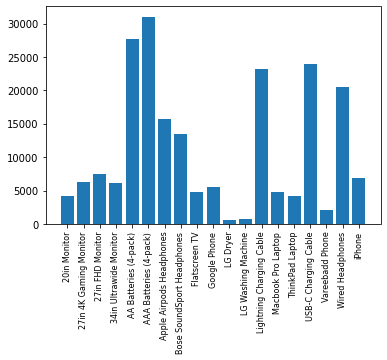

In [85]:
keys = [product for product, df in df.groupby("Product")]
plt.bar(keys, df.groupby("Product").sum()["Quantity Ordered"])
plt.xticks(keys, rotation='vertical', size=8)

plt.show()

In [87]:
df.groupby('Product').mean()["Price Each"]

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

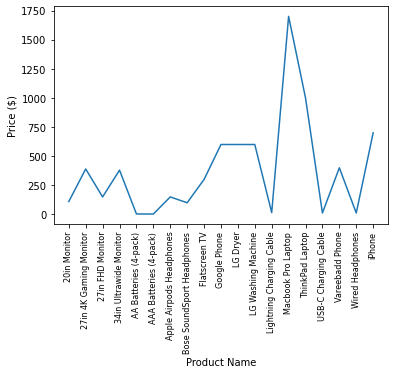

In [90]:
plt.plot(keys, df.groupby('Product').mean()["Price Each"])
plt.xticks(keys, rotation="vertical", size=8)
plt.xlabel('Product Name')
plt.ylabel('Price ($)')

plt.show()

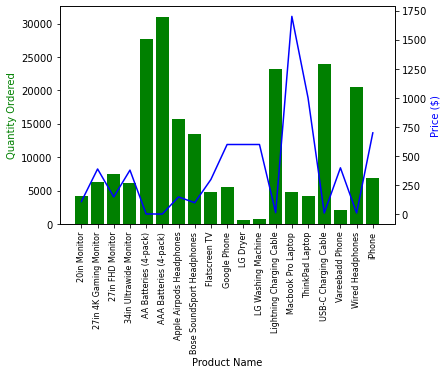

In [91]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(keys, df.groupby("Product").sum()["Quantity Ordered"], color='g')
ax2.plot(keys, df.groupby('Product').mean()["Price Each"], color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()